# Run No Abs

In [1]:
cd ..

/private/home/yannd/projects/Neural-Process-Family


In [2]:
import neuralproc

In [3]:
import submitit
from train_imgs import main, parse_arguments

log_folder="logs/%j"

In [4]:
def repeat_list(l, n):
    return [i for i in l for _ in range(n)]

class Run:
    def checkpoint(self, args):
        """Resubmits the same callable with the same arguments but makes sure continnue from last chckpnt."""
        args.is_continue_train=True 
        return submitit.utils.DelayedSubmission(self, args)
    
    def __call__(self, args):
        job_env = submitit.utils.JobEnvironment()
        args.starting_run = args.starting_run * job_env.num_tasks + job_env.local_rank
        return main(args)

In [7]:
named_params =[("", ""),
               ("_nonorm", "--is-no-normalization")]

datasets = ["celeba32", "mnist", "svhn", "celeba64", "zs-multi-mnist"]


args = [parse_arguments("GridedCCP {} --name GridedCCP_noabs{} --starting-run {} --chckpnt-dirname results/iclr/ --is-no-abs {}".format(d, sffx, s, param).split())
        for s in range(6)
        for d in datasets
        for sffx,param in named_params]

In [8]:
executor=submitit.SlurmExecutor(folder=log_folder, max_num_timeout=3)
executor.update_parameters(num_gpus=1, 
                           time=60*24*2,
                           cpus_per_task=10,  
                           ntasks_per_node=1
                          )

In [9]:
job = executor.map_array(Run(), args)

In [12]:
j = job[0]
job

submitit WARNING (2019-09-24 17:29:38,545) - Call #3 - Bypassing sacct error Command '['sacct', '-o', 'JobID,State', '-j', '17930894']' returned non-zero exit status 1., status may be inaccurate.


submitit WARNING (2019-09-24 17:29:38,545) - Call #3 - Bypassing sacct error Command '['sacct', '-o', 'JobID,State', '-j', '17930894']' returned non-zero exit status 1., status may be inaccurate.


[SlurmJob<job_id=17930894_0, task_id=0, state="RUNNING">,
 SlurmJob<job_id=17930894_1, task_id=0, state="RUNNING">,
 SlurmJob<job_id=17930894_2, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_3, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_4, task_id=0, state="RUNNING">,
 SlurmJob<job_id=17930894_5, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_6, task_id=0, state="RUNNING">,
 SlurmJob<job_id=17930894_7, task_id=0, state="RUNNING">,
 SlurmJob<job_id=17930894_8, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_9, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_10, task_id=0, state="RUNNING">,
 SlurmJob<job_id=17930894_11, task_id=0, state="RUNNING">,
 SlurmJob<job_id=17930894_12, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_13, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_14, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_15, task_id=0, state="COMPLETED">,
 SlurmJob<job_id=17930894_16, task_id=0, state="

In [13]:
for j in job:
    print("--------------------------------")
    print(j.stdout())

--------------------------------
submitit INFO (2019-09-21 09:09:09,592) - Starting with JobEnvironment(job_id=17930894_0, hostname=learnfair0214, local_rank=0(1), node=0(1), global_rank=0(1))
submitit INFO (2019-09-21 09:09:09,592) - Loading pickle: /private/home/yannd/projects/Neural-Process-Family/logs/17930894_0/17930894_0_submitted.pkl
no_abs

--- Training celeba32/GridedCCP_noabs/run_0 ---

  epoch    train_loss    valid_loss    cp       dur
-------  ------------  ------------  ----  --------
      1       -2.0334       -2.7157     +  839.3820
      2       -2.8454       -2.8510     +  399.8569
      3       -2.9273       -3.0208     +  375.1538
      4       -2.9810       -2.9733        373.4595
      5       -2.9872       -3.0322     +  382.9210
      6       -3.0180       -2.9996        396.3314
      7       -3.0290       -3.0156        392.6032
      8       -3.0419       -3.0675     +  409.7848
      9       -3.0440       -3.0406        393.2299
     10       -3.0541       

In [14]:
for j in job:
    print("--------------------------------")
    print(j.stderr())

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:submitit:Job completed successfully

--------------------------------
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:submitit:Job completed successfully

--------------------------------
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:submitit:Job completed successfully

--------------------------------
INFO:

In [15]:
from utils.helpers import load_all_results

In [6]:
results=load_all_results("results/imgs").groupby(["Data", "Model"]).agg(["count","mean","std"]).reset_index()

In [60]:
t1=results.pivot_table(values="LogLike", index="Model", columns="Data")["mean"].loc[["GridedCCP_noabs_nonorm","GridedCCP_noabs"],:]

In [19]:
results=load_all_results("results/iclr").groupby(["Data", "Model"]).agg(["mean","std"]).reset_index()

In [20]:
results.pivot_table(values="LogLike", index="Model", columns="Data")

mean                                               \
Data                    celeba32  celeba64     mnist      svhn zs-multi-mnist   
Model                                                                           
GridedCCP               3.189612  3.641896  1.192756  3.892689       1.206837   
GridedCCP_large         3.348835  3.697071  1.259766  3.969055       0.302583   
GridedCCP_no_density    3.147637  3.616212  1.152608  3.877042       1.131187   
GridedCCP_no_norm       3.159699  3.621540  1.193550  3.864701       1.202753   
GridedCCP_noabs         3.076240  3.562211  1.153952  3.834699       1.145723   
GridedCCP_noabs_nonorm  3.159254  3.622247  1.191520  3.856335       1.198882   
GridedCCP_rbf           3.177886  3.626489  1.191303  3.886865       1.210399   
SelfAttnCNP             3.182620       NaN  1.076328  3.943764      -0.828911   

                             std                                               
Data                    celeba32  celeba64     mnist      svhn zs-multi-mnist  
Model                                                                          
GridedCCP               0.022758  0.005689  0.006284  0.011921       0.004385  
GridedCCP_large         0.020439  0.009171  0.005840  0.026102       0.748818  
GridedCCP_no_density    0.021082  0.005163  0.007343  0.014566       0.077255  
GridedCCP_no_norm       0.033209  0.005991  0.005707  0.026639       0.006133  
GridedCCP_noabs         0.031238  0.010440  0.015529  0.016775       0.006254  
GridedCCP_noabs_nonorm  0.031779  0.006362  0.007315  0.030229       0.013396  
GridedCCP_rbf           0.022731  0.009268  0.004030  0.013488       0.003908  
SelfAttnCNP             0.020023       NaN  0.043303  0.017116       0.075716

In [62]:
t2=results.pivot_table(values="LogLike", index="Model", columns="Data")["mean"].loc[["GridedCCP","GridedCCP_no_norm"],:]

In [63]:
import pandas as pd

In [64]:
pd.concat((t1,t2))

Data,celeba32,celeba64,mnist,svhn,zs-multi-mnist
Model,,,,,
GridedCCP_noabs_nonorm,3.178740,NaN,1.196449,3.859168,NaN
GridedCCP_noabs,3.075197,NaN,1.166871,3.825127,NaN
GridedCCP,3.189612,3.641896,1.192756,3.892689,1.206837
GridedCCP_no_norm,3.159699,3.621540,1.193550,3.864701,1.202753


In [21]:
%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# CENTER PLOTS
from IPython.core.display import HTML
display(HTML(""" <style> .output_png {display: table-cell; text-align: center; margin:auto; }
.prompt display:none;}  </style>"""))

    
import sys
sys.path.append("notebooks")

import numpy as np
import matplotlib.pyplot as plt
import torch

Autosaving every 600 seconds


In [22]:
from utils.data import get_dataset
from utils.data.helpers import train_dev_split
from utils.visualize import plot_dataset_samples_imgs, plot_losses #, plot_posterior_samples_imgs

celeba32_train, celeba32_test = train_dev_split(get_dataset("celeba32")(), dev_size=0.1, is_stratify=False)
svhn_train, svhn_test = get_dataset("svhn")(split="train"), get_dataset("svhn")(split="test")
mnist_train, mnist_test = get_dataset("mnist")(split="train"), get_dataset("mnist")(split="test")

# celeba64 not fully trained yet
train_datasets_32 = {"mnist":mnist_train, "celeba32":celeba32_train, "svhn":svhn_train}
test_datasets_32 = {"mnist":mnist_test, "celeba32":celeba32_test, "svhn":svhn_test}

Using downloaded and verified file: /private/home/yannd/projects/Neural-Process-Family/utils/data/../../data/train_32x32.mat
Using downloaded and verified file: /private/home/yannd/projects/Neural-Process-Family/utils/data/../../data/test_32x32.mat


In [23]:

from neuralproc import NeuralProcessLoss
from utils.train import train_models
from utils.data import cntxt_trgt_collate
import skorch
from functools import partial

import os
import contextlib

def add_y_dim(models, datasets):
    """Add y _dim to all ofthe models depending on the dataset."""
    return {data_name: {model_name: partial(model, y_dim=data_train.shape[0]) 
                        for model_name, model in models.items()} 
            for data_name, data_train in datasets.items()}

from train_imgs import get_model


models_grided_32 = {}
models_grided_32["GridedCCP_noabs_nonorm"] = get_model("GridedCCP",  img_shape=(32,32), is_no_abs=True, is_no_normalization=True)
models_grided_32["GridedCCP_noabs"] = get_model("GridedCCP",  img_shape=(32,32), is_no_abs=True)
models_grided_32["GridedCCP"] = get_model("GridedCCP",  img_shape=(32,32))
models_grided_32["GridedCCP"] = get_model("GridedCCP",  img_shape=(32,32))


no_abs
no_abs


In [24]:

kwargs = dict(chckpnt_dirname="results/iclr/", 
             is_retrain=False, 
             train_split=skorch.dataset.CVSplit(0.1), # use 10% of data for validation 
             patience=10,
             batch_size=16,
             seed=123,
             runs=6)


trainers_grided_32 = train_models(train_datasets_32, 
                                 add_y_dim(models_grided_32, train_datasets_32),
                                  NeuralProcessLoss,
                                 **kwargs) 


--- Loading mnist/GridedCCP_noabs_nonorm/run_0 ---

mnist/GridedCCP_noabs_nonorm/run_0 | best epoch: 27 | train loss: -1.2124 | valid loss: -1.2357 | test log likelihood: None

--- Loading mnist/GridedCCP_noabs_nonorm/run_1 ---

mnist/GridedCCP_noabs_nonorm/run_1 | best epoch: 20 | train loss: -1.2127 | valid loss: -1.2317 | test log likelihood: None

--- Loading mnist/GridedCCP_noabs_nonorm/run_2 ---

mnist/GridedCCP_noabs_nonorm/run_2 | best epoch: 38 | train loss: -1.218 | valid loss: -1.2487 | test log likelihood: None

--- Loading mnist/GridedCCP_noabs_nonorm/run_3 ---

mnist/GridedCCP_noabs_nonorm/run_3 | best epoch: 17 | train loss: -1.2028 | valid loss: -1.2249 | test log likelihood: None

--- Loading mnist/GridedCCP_noabs_nonorm/run_4 ---

mnist/GridedCCP_noabs_nonorm/run_4 | best epoch: 18 | train loss: -1.2087 | valid loss: -1.2313 | test log likelihood: None

--- Loading mnist/GridedCCP_noabs_nonorm/run_5 ---

mnist/GridedCCP_noabs_nonorm/run_5 | best epoch: 9 | train loss


--- Loading svhn/GridedCCP/run_2 ---

svhn/GridedCCP/run_2 | best epoch: 24 | train loss: -3.9238 | valid loss: -3.9554 | test log likelihood: None

--- Loading svhn/GridedCCP/run_3 ---

svhn/GridedCCP/run_3 | best epoch: 13 | train loss: -3.8931 | valid loss: -3.9304 | test log likelihood: None

--- Loading svhn/GridedCCP/run_4 ---

svhn/GridedCCP/run_4 | best epoch: 16 | train loss: -3.9077 | valid loss: -3.9329 | test log likelihood: None

--- Loading svhn/GridedCCP/run_5 ---

svhn/GridedCCP/run_5 | best epoch: 9 | train loss: -3.8791 | valid loss: -3.9521 | test log likelihood: None


In [25]:
from utils.train import _best_loss
import pandas as pd
from utils.helpers import count_parameters

def get_efficiency(trainers):
    out = []
    for name, trainer in trainers.items():
        _, best_epoch = _best_loss(trainer)
        l = [epoch_hist['dur'] for epoch_hist in trainer.history]
        out.append(name.split("/")+[best_epoch, sum(l)/len(l), count_parameters(trainer.module_)])
    return pd.DataFrame(out, columns=["Data", "Model", "Runs", "Convergence Epoch", "Time Per Epoch", "N. Param"])

In [26]:
get_efficiency(trainers_grided_32).groupby(["Data", "Model"]).median().reset_index()

,Data,Model,Convergence Epoch,Time Per Epoch,N. Param
0,celeba32,GridedCCP,19.0,421.549205,164511.0
1,celeba32,GridedCCP_noabs,19.0,424.116470,164511.0
2,celeba32,GridedCCP_noabs_nonorm,19.0,414.203496,164511.0
3,mnist,GridedCCP,19.0,100.103737,163637.0
4,mnist,GridedCCP_noabs,24.0,73.572033,163637.0
5,mnist,GridedCCP_noabs_nonorm,19.0,79.772923,163637.0
6,svhn,GridedCCP,18.0,122.668675,164511.0
7,svhn,GridedCCP_noabs,19.5,90.792809,164511.0
8,svhn,GridedCCP_noabs_nonorm,23.0,112.303710,164511.0


GridedCCP_noabs_nonorm tensor(5.6931)
GridedCCP_noabs tensor(2.4378)
GridedCCP tensor(12.4873)


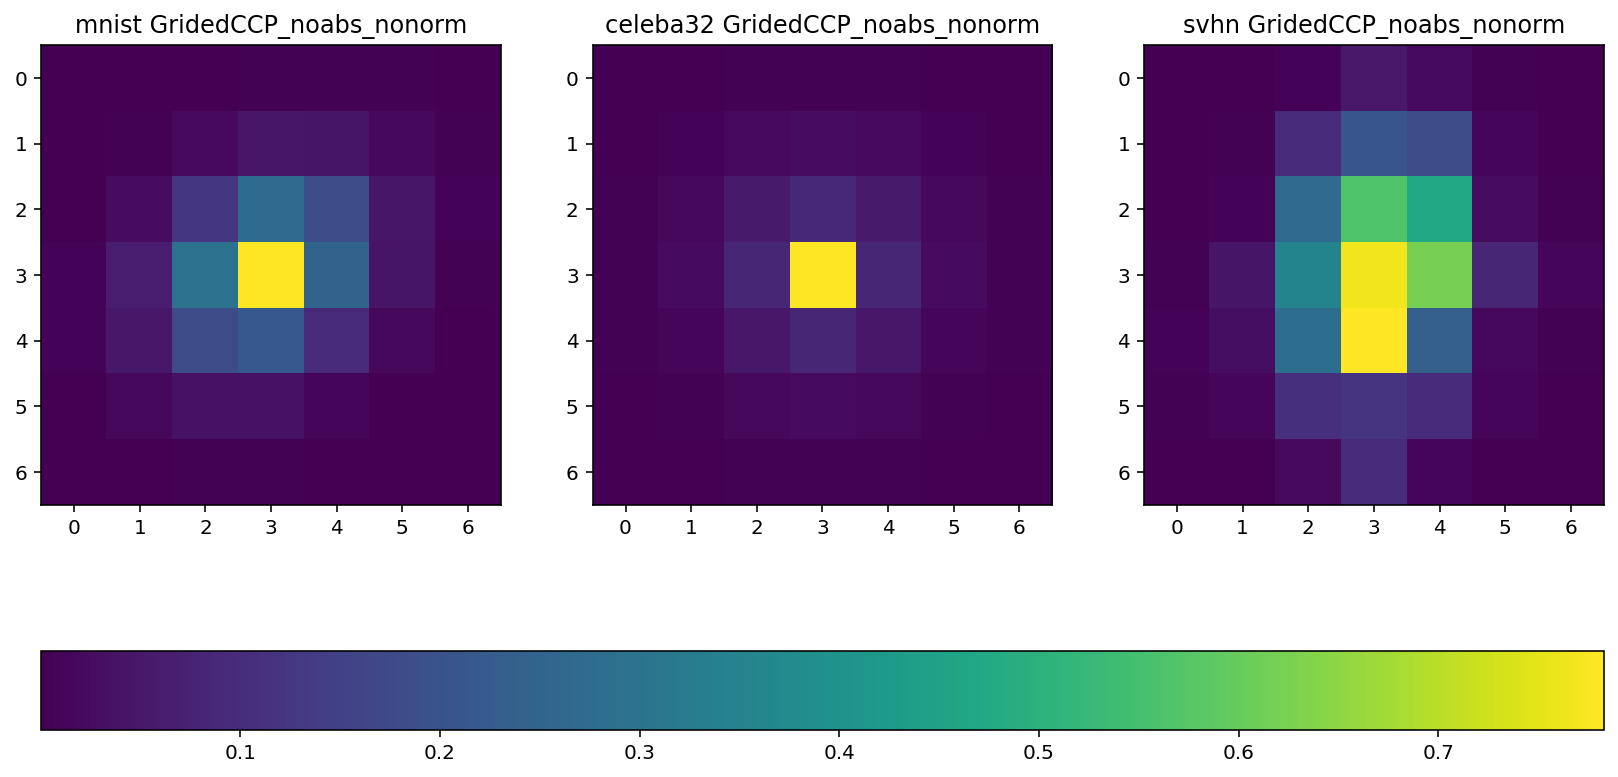

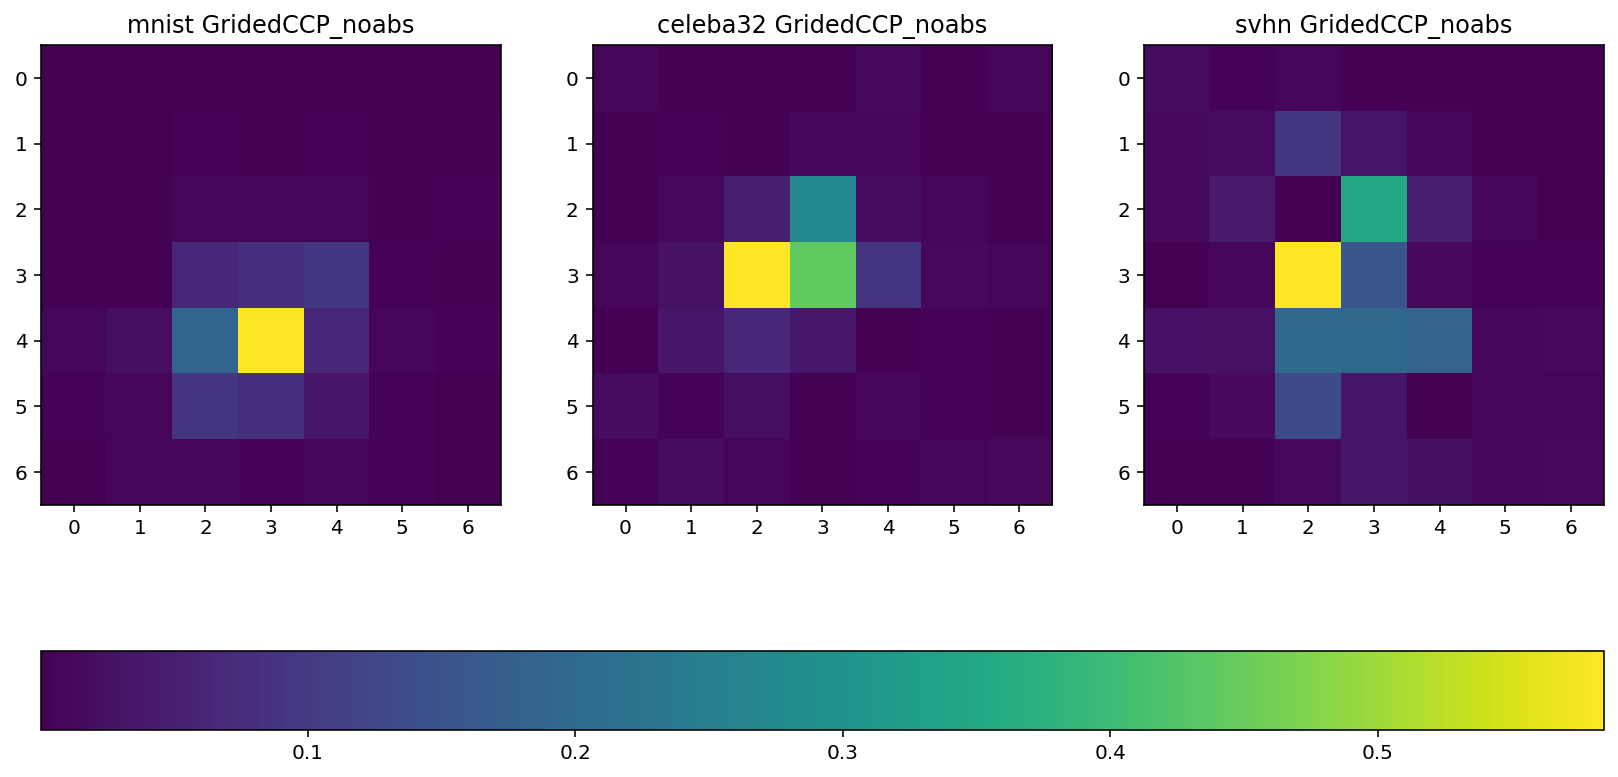

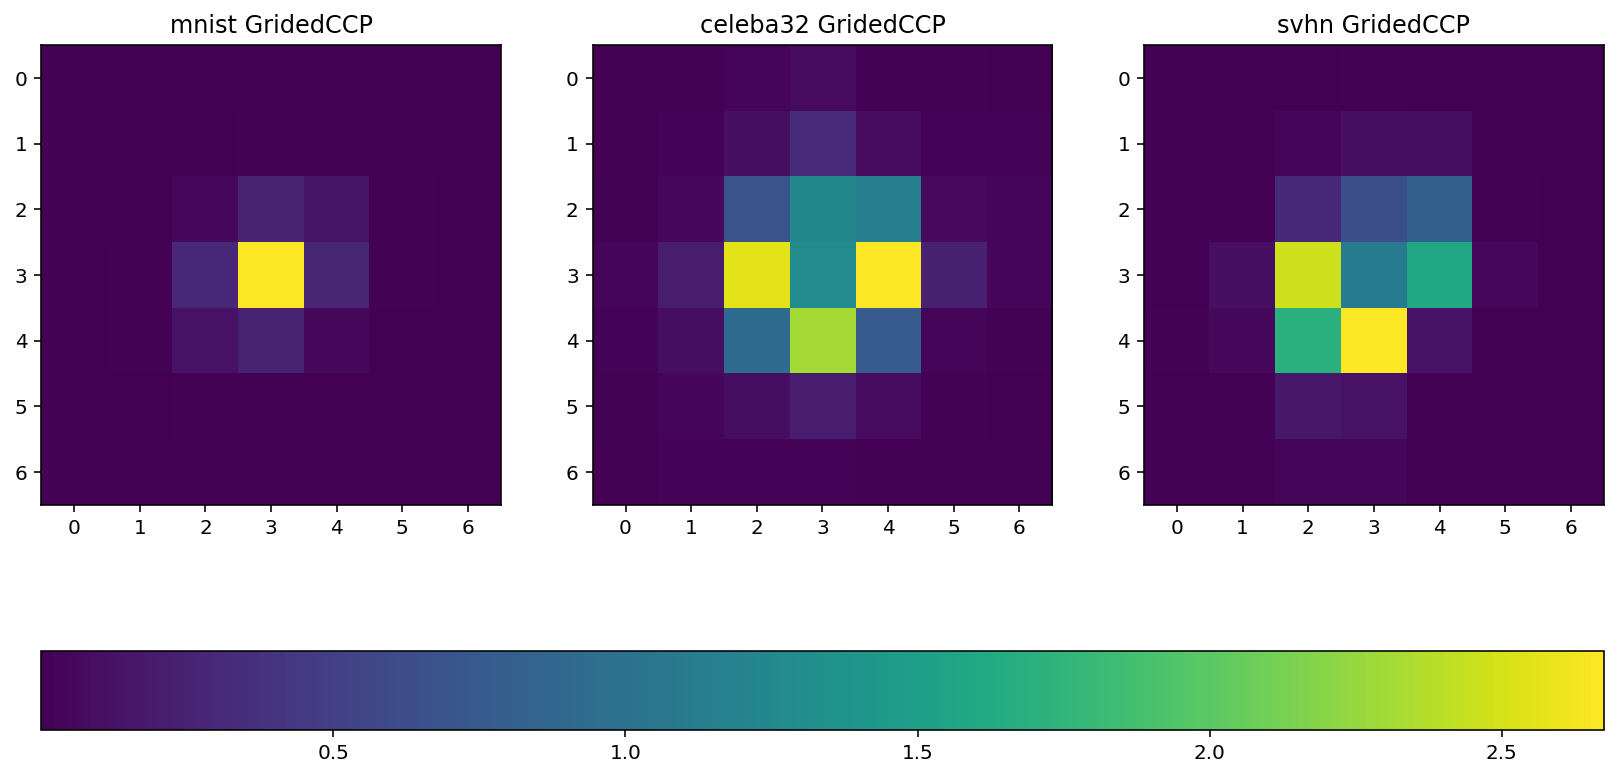

In [68]:
import matplotlib.pyplot as plt

dataset = ["mnist",  "celeba32", "svhn"]

for m in ["GridedCCP_noabs_nonorm", "GridedCCP_noabs", "GridedCCP"]:
    fig, axes = plt.subplots(1,len(dataset), figsize=(14,9))

    for i, d in enumerate(dataset):
        # use abs because I force positive weights in my implementation
        weights_layer_1 = trainers_grided_32['{}/{}/run_1'.format(d, m)].module_.conv.weight.squeeze(1).mean(0).abs()
        im = axes[i].imshow(weights_layer_1.detach().numpy())
        axes[i].set_title(d+ " "+ m)

    fig.colorbar(im,  orientation="horizontal", ax=axes.ravel().tolist())
    
    print(m,weights_layer_1.sum().detach())


In [ ]:
weights_layer_1